In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("C:/Users/Ruchita/Downloads/Datascience/glass.csv")

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.value_counts(['Type'])

Type
2       76
1       70
7       29
3       17
5       13
6        9
dtype: int64

In [5]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [6]:
df.values

array([[ 1.52101, 13.64   ,  4.49   , ...,  0.     ,  0.     ,  1.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  0.     ,  0.     ,  1.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  0.     ,  0.     ,  1.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  1.64   ,  0.     ,  7.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  1.57   ,  0.     ,  7.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  1.67   ,  0.     ,  7.     ]])

In [7]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [9]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [10]:
df.describe(include='all')

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [11]:
x=df.iloc[:,:9]
x.head(2)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0


In [12]:
y=df.iloc[:,-1]
y.head(2)

0    1
1    1
Name: Type, dtype: int64

In [13]:
x=preprocessing.StandardScaler().fit_transform(x)
x[0:9]

array([[ 0.87286765,  0.28495326,  1.25463857, -0.69244192, -1.12708201,
        -0.67170546, -0.14576634, -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, -0.17046023,  0.10231907,
        -0.02621325, -0.79373376, -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249,  0.19091171,  0.43878673,
        -0.16453301, -0.82894938, -0.35287683, -0.5864509 ],
       [-0.23283051, -0.24285268,  0.69870999, -0.31099376, -0.0529737 ,
         0.11210651, -0.51905192, -0.35287683, -0.5864509 ],
       [-0.31204471, -0.16920534,  0.65006624, -0.41137486,  0.55525631,
         0.08136879, -0.62469878, -0.35287683, -0.5864509 ],
       [-0.79393107, -0.75838406,  0.64311714,  0.35152146,  0.4129046 ,
         0.21968855, -0.62469878, -0.35287683,  2.08814977],
       [-0.30874412, -0.13238167,  0.63616803, -0.61213705,  0.56819737,
         0.12747538, -0.55426754, -0.35287683, -0.5864509 ],
       [-0.26583643, -0.31650002,  0.64311714, -0.79282302,  0

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=1)
y_test.shape

(65,)

In [15]:
knnmodel=KNeighborsClassifier()
knnmodel.fit(x_train,y_train)
y_pred=knnmodel.predict(x_test)

In [16]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
acc

0.7384615384615385

In [17]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [18]:
cm

array([[20,  4,  1,  0,  0,  0],
       [ 2, 17,  0,  0,  2,  0],
       [ 5,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0,  8]], dtype=int64)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.74      0.80      0.77        25
           2       0.71      0.81      0.76        21
           3       0.00      0.00      0.00         7
           5       1.00      1.00      1.00         2
           6       0.33      1.00      0.50         1
           7       1.00      0.89      0.94         9

    accuracy                           0.74        65
   macro avg       0.63      0.75      0.66        65
weighted avg       0.69      0.74      0.71        65



In [20]:
error=[]
for i in range(1,50):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error.append(np.mean(pred_i !=y_test))

Text(0, 0.5, 'Mean error')

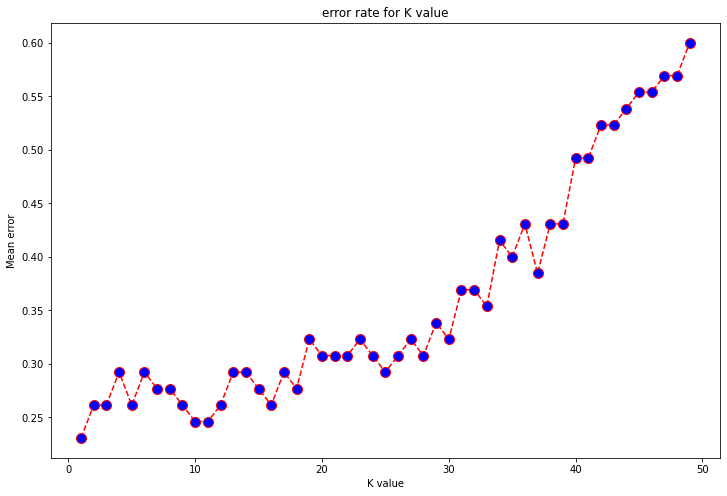

In [21]:
plt.figure(figsize=(12,8))
plt.plot(range(1,50),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('error rate for K value')
plt.xlabel('K value')
plt.ylabel('Mean error')

In [22]:
#salecting the K value 3,10 or 11 for best model accuracy

In [23]:
# SALECT K=3 and check model accuracy

In [25]:
# training and pred
knnmodel=KNeighborsClassifier(n_neighbors=3)
knnmodel.fit(x_train,y_train)
y_pred=knnmodel.predict(x_test)

In [26]:
#accuracy
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
acc

0.7384615384615385